In [1]:
import time
tim = time.time()
# in delays03312017.csv, only flights delayed > 14 are counted
import pandas as pd
import numpy as np
flights = pd.read_csv('flightsbyWW.csv')
flights = pd.DataFrame(flights)
print "Time to run code is ", time.time() - tim

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Time to run code is  35.7856869698


In [2]:
flights2 = flights[['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'WW']].copy()

In [3]:
flights3 = flights2.copy()

In [4]:
# 1 out of 6 flights delayed > 15 minutes
flights3.shape

(5714008, 12)

In [5]:
list_of_airlines = flights3['AIRLINE'].unique().tolist()
WorkWeek = np.arange(1,54)

In [6]:
delay_types = []
delays = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [7]:
delay_types = []
def delay_reason(Week):
    for plane in list_of_airlines:
        flights3 = flights2.copy()
        flights3 = flights3[flights3['WW']== Week]
        flights3 = flights3[flights3['AIRLINE'] == plane]
        for reason in delays:
            flights3 = flights3[flights3['WW']== Week]
            flights3 = flights3[flights3['AIRLINE'] == plane]
            delay = 0
            delay = len(flights3[flights3[reason] > 10])
            delay = float(delay)
            total_flights = 0
            total_flights = len(flights3['AIRLINE'])
            total_flights = float(total_flights)
            if total_flights > 0:
                percent = 0.0
                percent = (delay/total_flights)*100
                delay_types.append(percent)
            else:
                delay_types.append(0)
            flights3 = flights2.copy()
            


In [8]:
tim = time.time()
for num in WorkWeek:
    delay_reason(num)
print "Time to run code is ", time.time() - tim, "seconds"

Time to run code is  2726.02937698 seconds


In [9]:
len(delay_types)

3710

In [13]:
delay_agg = pd.DataFrame(delay_types)

In [14]:
delay_agg['WW'] = 0

In [15]:
delay_agg.index = delay_agg.index + 1

In [16]:
delay_agg.tail()

,0,WW
3706,5.379310,0
3707,0.413793,0
3708,7.724138,0
3709,11.724138,0
3710,0.689655,0


In [17]:
weeks = 1
for i,row in delay_agg.iterrows():
    if i % 70 != 0:
        delay_agg.set_value(i,'WW',weeks)
    else:
        delay_agg.set_value(i,'WW',weeks)
        weeks = weeks + 1

In [18]:
delay_agg['AIRLINE'] = ""
delay_agg.head()

,0,WW,AIRLINE
1,8.910891,1,
2,0.055006,1,
3,7.150715,1,
4,7.700770,1,
5,1.045105,1,


In [19]:
car = 0
for j,row in delay_agg.iterrows():
    if j % 5 != 0:
        delay_agg.set_value(j,'AIRLINE',list_of_airlines[car])
    else:
        delay_agg.set_value(j,'AIRLINE',list_of_airlines[car])
        car = car + 1
        if car > 13:
            car = 0
        else: continue

In [20]:
delay_agg['Delay_Type'] = ""
delay_agg.head()

,0,WW,AIRLINE,Delay_Type
1,8.910891,1,AS,
2,0.055006,1,AS,
3,7.150715,1,AS,
4,7.700770,1,AS,
5,1.045105,1,AS,


In [21]:
var2 = 0
for j,row in delay_agg.iterrows():
    delay_agg.set_value(j,'Delay_Type',delays[var2])
    var2 = var2 + 1
    if var2 > 4:
        var2 = 0
    else: continue


In [22]:
delay_agg.head()

,0,WW,AIRLINE,Delay_Type
1,8.910891,1,AS,AIR_SYSTEM_DELAY
2,0.055006,1,AS,SECURITY_DELAY
3,7.150715,1,AS,AIRLINE_DELAY
4,7.700770,1,AS,LATE_AIRCRAFT_DELAY
5,1.045105,1,AS,WEATHER_DELAY


In [23]:
delay_agg = delay_agg.pivot_table(index='WW', columns=['AIRLINE', 'Delay_Type'], values=0)


In [24]:
delay_agg.head(20)

AIRLINE               AA                                                      \
Delay_Type AIRLINE_DELAY AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY SECURITY_DELAY   
WW                                                                             
1              16.778639        15.348837           24.341085       0.241171   
2              12.231320         9.682702           14.247697       0.010235   
3               6.825169         5.287969            6.148801       0.040992   
4               5.282980         5.751221            4.183632       0.010179   
5               5.086245         5.351614            3.748341       0.011057   
6               6.098580         7.852966            5.837510       0.020886   
7               5.519447         5.591664            4.260807       0.010317   
8               8.385508        10.232988            8.457354       0.061583   
9              13.024902        16.271973           12.988281       0.048828   
10             12.824658        10.367496           11.962496       0.043108   
11              8.273660         7.760790            8.680085       0.009677   
12              7.465581         6.263331            6.815978       0.058173   
13              7.079818         6.847057            8.049656       0.019397   
14              6.276586         6.238775            5.539276       0.009453   
15              7.412060         7.479706            6.957866       0.019327   
16              6.556895         7.419386            8.448496       0.068607   
17              7.215277         9.912393            8.396496       0.019687   
18              6.402647         4.631702            5.711784       0.009730   
19              7.030595         9.335708            9.744342       0.031433   
20              7.036183         6.013832            6.955999       0.030069   

AIRLINE                             AS                                       \
Delay_Type WEATHER_DELAY AIRLINE_DELAY AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY   
WW                                                                            
1               1.705426      7.150715         8.910891            7.700770   
2               2.487206      4.233871         6.216398            5.544355   
3               0.348432      3.670972         5.914344            4.520734   
4               0.396987      2.664845         4.509737            3.177315   
5               0.895621      4.295533         6.082474            7.182131   
6               1.315789      3.746203         8.234897            6.513669   
7               0.845971      3.871608         4.831238            4.864328   
8               1.734579      3.651316         4.144737            4.769737   
9               5.444336      3.644798         5.632869            4.738237   
10              1.217804      3.614458         5.307717            3.907522   
11              0.087091      5.370370         9.104938            8.024691   
12              0.222998      3.869779         4.484029            3.716216   
13              1.008632      3.890931         3.492647            3.768382   
14              1.068154      4.594511         3.576935            4.039470   
15              1.198299      2.763279         3.377341            2.486951   
16              3.332353      3.053671         4.780999            3.701419   
17              2.126194      3.226807         4.560968            4.188644   
18              0.467062      3.462133         2.905719            3.307573   
19              4.306370      2.875497         6.240441            3.303763   
20              0.992282      3.432564         5.346294            3.402187   

AIRLINE                                      ...                 VX  \
Delay_Type SECURITY_DELAY WEATHER_DELAY      ...      AIRLINE_DELAY   
WW                                           ...                      
1                0.055006      1.045105      ...           6.240487   
2                0.033602      1.344086      ...         

In [25]:
delay_agg.columns

MultiIndex(levels=[[u'AA', u'AS', u'B6', u'DL', u'EV', u'F9', u'HA', u'MQ', u'NK', u'OO', u'UA', u'US', u'VX', u'WN'], [u'AIRLINE_DELAY', u'AIR_SYSTEM_DELAY', u'LATE_AIRCRAFT_DELAY', u'SECURITY_DELAY', u'WEATHER_DELAY']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'AIRLINE', u'Delay_Type'])

In [26]:
list_of_airlines

['AS',
 'AA',
 'US',
 'DL',
 'NK',
 'UA',
 'HA',
 'B6',
 'OO',
 'EV',
 'F9',
 'WN',
 'MQ',
 'VX']

<IPython.core.display.Javascript object>


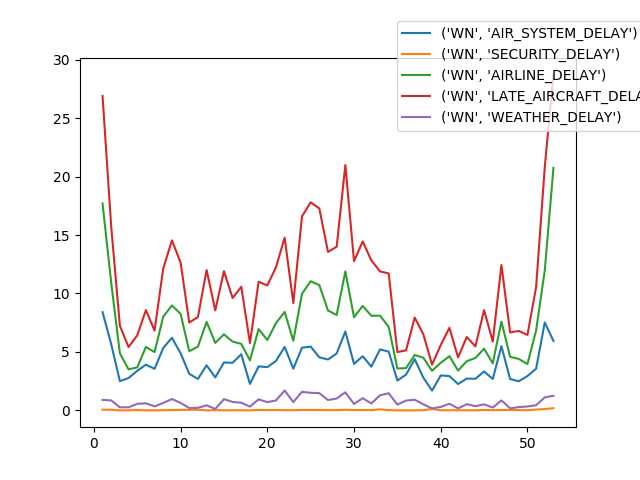

In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()

for word in delays:
    plt.plot(delay_agg['WN', word])
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.95))
